# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

In [ ]:
#Check the actual image

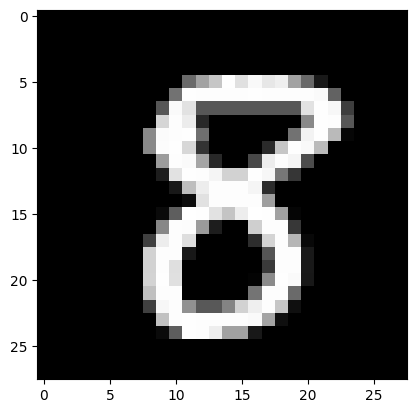

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 10s 21ms/step - loss: 0.2563 - accuracy: 0.9213 - val_loss: 0.1134 - val_accuracy: 0.9658
Epoch 2/30
469/469 [==============================] - 13s 27ms/step - loss: 0.1077 - accuracy: 0.9671 - val_loss: 0.0779 - val_accuracy: 0.9755
Epoch 3/30
469/469 [==============================] - 10s 20ms/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.0796 - val_accuracy: 0.9772
Epoch 4/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0739 - val_accuracy: 0.9781
Epoch 5/30
469/469 [==============================] - 9s 20ms/step - loss: 0.0467 - accuracy: 0.9849 - val_loss: 0.0634 - val_accuracy: 0.9819
Epoch 6/30
469/469 [==============================] - 10s 20ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0661 - val_accuracy: 0.9824
Epoch 7/30
469/469 [==============================] - 17s 36ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0689 - val_accuracy: 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10085882991552353
Test accuracy: 0.9840999841690063


Interpret the result

#type your answer here

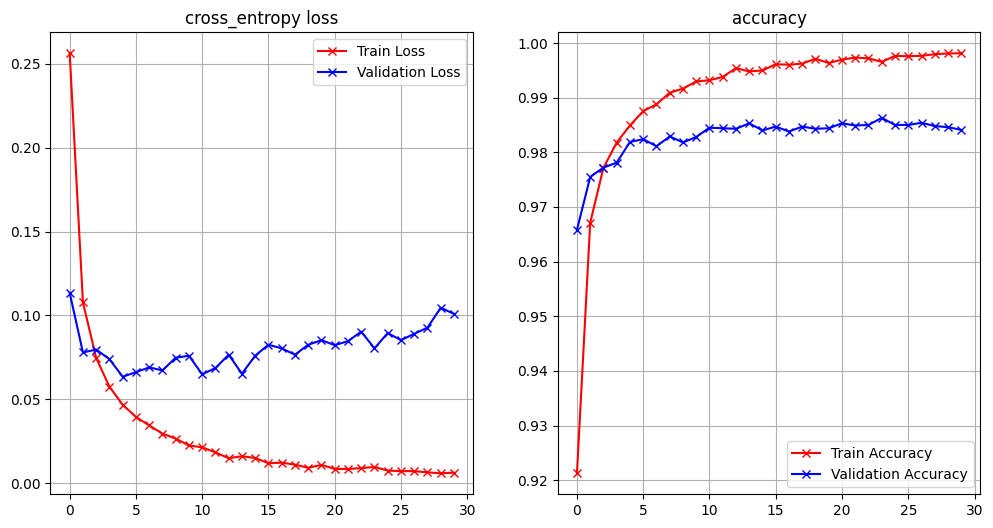

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
#type your code here

from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD

In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_1 = Sequential()

#Building the first hidden layer with size 400
model_1.add(Dense(400, activation = 'relu', input_shape = (784, )))

#Regulating the first layer at 0.4
model_1.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_1.add(Dense(300, activation = 'relu', input_shape = (784, )))

#Regulating the first layer at 0.4
model_1.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_1.add(Dense(10, activation = 'softmax'))

In [ ]:
#Displaying the details of the model_1
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###### How many parameters does your model have? How does it compare with the previous model?

Model_1 has 437310 parameters while model has has 669706 using the MNIST dataset. The model_1 specifically has lesser parameter than model because of the number of neurons given to each layers. For model, it has 512 neurons each layer resulting to

    model's total params =  (512 [Layer 1 neurons] * 784 [input_shape] + 512 [Bias])
    
    + (512 [Layer 2 neurons] * 512 [input_shape] + 512 [Bias])
    
    + (10 [output neurons] * 512 [input_shape] + 10 [bias])

while

    model_1's total params = (400 [Layer 1 neurons] * 784 [input_shape] + 400 [Bias])
    
    + (300 [Layer 2 neurons] * 400 [input_shape] + 300 [Bias])
    
    + (10 [output neurons] * 300 [input_shape] + 10 [bias])


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

hist_1 = model_1.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.3320 - accuracy: 0.8991 - val_loss: 0.1296 - val_accuracy: 0.9601
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1540 - accuracy: 0.9541 - val_loss: 0.0972 - val_accuracy: 0.9715
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1197 - accuracy: 0.9644 - val_loss: 0.0957 - val_accuracy: 0.9726
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0987 - accuracy: 0.9697 - val_loss: 0.0787 - val_accuracy: 0.9775
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0869 - accuracy: 0.9740 - val_loss: 0.0757 - val_accuracy: 0.9784
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0805 - accuracy: 0.9761 - val_loss: 0.0711 - val_accuracy: 0.9799
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0727 - accuracy: 0.9789 - val_loss: 0.0601 - val_accuracy: 0.983

In [ ]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.06992145627737045
Test accuracy: 0.984499990940094


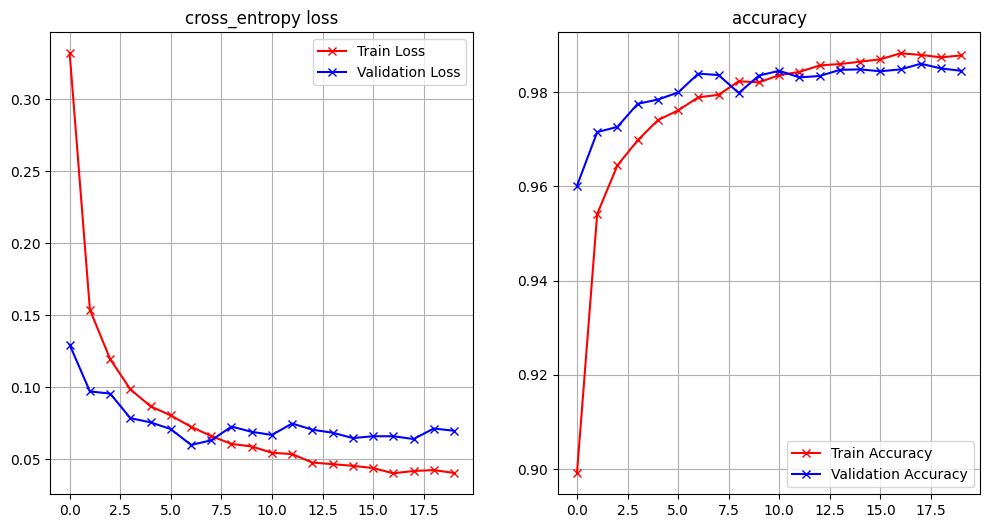

In [ ]:
plot_loss_accuracy(hist_1)

##### Use at least two regularization techniques and apply it to the new model (model_2)

In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_2 = Sequential()

#Building the first hidden layer with size 400
model_2.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_2.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_2.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1(0.001)))

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

hist_2 = model_2.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 3.2030 - accuracy: 0.8133 - val_loss: 1.4321 - val_accuracy: 0.8777
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 1.4437 - accuracy: 0.8547 - val_loss: 1.2308 - val_accuracy: 0.9068
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 1.3323 - accuracy: 0.8651 - val_loss: 1.1467 - val_accuracy: 0.9132
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 1.2762 - accuracy: 0.8716 - val_loss: 1.0907 - val_accuracy: 0.9261
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 1.2485 - accuracy: 0.8734 - val_loss: 1.0828 - val_accuracy: 0.9201
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 1.2193 - accuracy: 0.8765 - val_loss: 1.0551 - val_accuracy: 0.9244
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 1.2036 - accuracy: 0.8790 - val_loss: 1.0425 - val_accuracy: 0.9262

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.973791778087616
Test accuracy: 0.9337999820709229


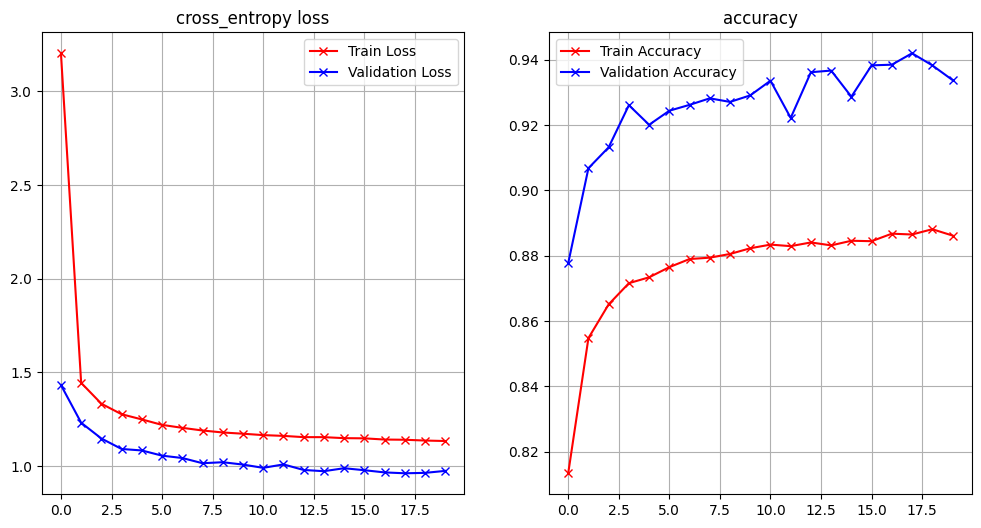

In [ ]:
plot_loss_accuracy(hist_2)

##### Train this model for your preferred epochs , learning rate, batch size and optimizer

In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_2 = Sequential()

#Building the first hidden layer with size 400
model_2.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_2.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_2.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1(0.001)))

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(lr = 0.0001),
    metrics = ['accuracy']
)

hist_2 = model_2.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 100,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/100
1875/1875 [==============================] - 16s 8ms/step - loss: 1.0832 - accuracy: 0.8707 - val_loss: 0.9207 - val_accuracy: 0.9210
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 1.0682 - accuracy: 0.8738 - val_loss: 0.9070 - val_accuracy: 0.9209
Epoch 3/100
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0630 - accuracy: 0.8709 - val_loss: 0.8960 - val_accuracy: 0.9243
Epoch 4/100
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0510 - accuracy: 0.8733 - val_loss: 0.8901 - val_accuracy: 0.9241
Epoch 5/100
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0397 - accuracy: 0.8758 - val_loss: 0.8790 - val_accuracy: 0.9227
Epoch 6/100
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0347 - accuracy: 0.8761 - val_loss: 0.8674 - val_accuracy: 0.9262
Epoch 7/100
1875/1875 [==============================] - 16s 8ms/step - loss: 1.0267 - accuracy: 0.8770 - val_loss: 0.8616 -

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.7061268091201782
Test accuracy: 0.9449999928474426


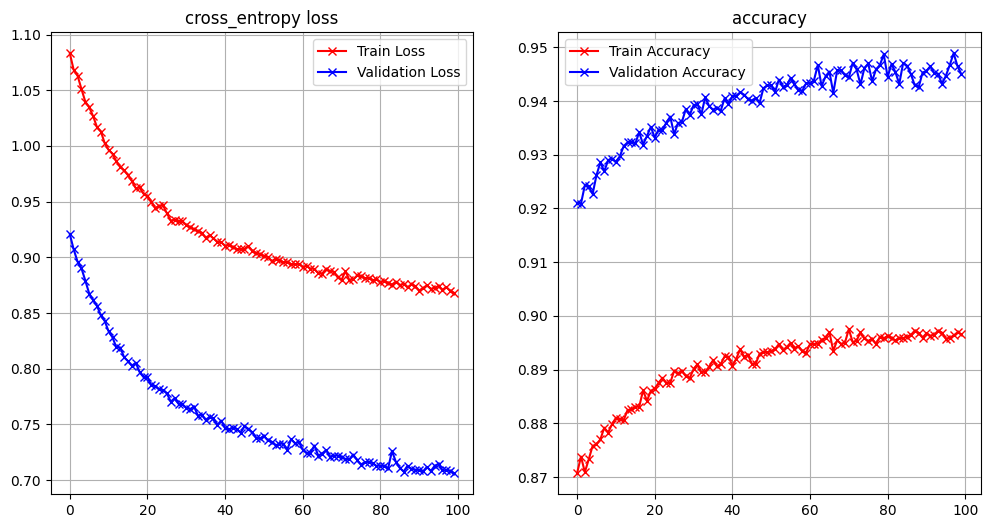

In [ ]:
plot_loss_accuracy(hist_2)

##### Trial 1

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(lr = 0.0001),
    metrics = ['accuracy']
)

hist_2 = model_2.fit(
    x_train,
    y_train,
    batch_size = 256,
    epochs = 30,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/30
235/235 [==============================] - 7s 26ms/step - loss: 1.0345 - accuracy: 0.8874 - val_loss: 0.8494 - val_accuracy: 0.9390
Epoch 2/30
235/235 [==============================] - 5s 20ms/step - loss: 1.0115 - accuracy: 0.8864 - val_loss: 0.8466 - val_accuracy: 0.9394
Epoch 3/30
235/235 [==============================] - 6s 24ms/step - loss: 1.0078 - accuracy: 0.8871 - val_loss: 0.8433 - val_accuracy: 0.9391
Epoch 4/30
235/235 [==============================] - 5s 21ms/step - loss: 1.0010 - accuracy: 0.8895 - val_loss: 0.8342 - val_accuracy: 0.9380
Epoch 5/30
235/235 [==============================] - 5s 20ms/step - loss: 0.9983 - accuracy: 0.8890 - val_loss: 0.8290 - val_accuracy: 0.9429
Epoch 6/30
235/235 [==============================] - 6s 25ms/step - loss: 0.9928 - accuracy: 0.8907 - val_loss: 0.8189 - val_accuracy: 0.9450
Epoch 7/30
235/235 [==============================] - 5s 20ms/step - loss: 0.9903 - accuracy: 0.8903 - val_loss: 0.8178 - val_accuracy: 0.9419

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.7673049569129944
Test accuracy: 0.9460999965667725


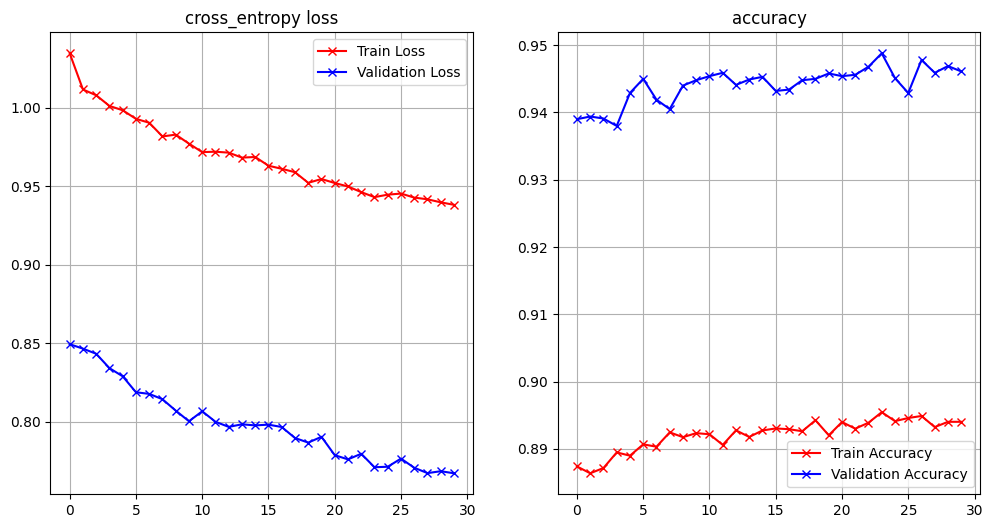

In [ ]:
plot_loss_accuracy(hist_2)

#### Conclusion

#type your answer here